In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
prices = pd.read_csv("round-1-island-data-bottle/prices_round_1_day_-2.csv", sep = ";")
prices = pd.concat([prices, pd.read_csv("round-1-island-data-bottle/prices_round_1_day_-1.csv", sep = ";")])
prices = pd.concat([prices, pd.read_csv("round-1-island-data-bottle/prices_round_1_day_0.csv", sep = ";")])
prices




,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
19996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0
19997,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
19998,0,999900,STARFRUIT,5048,2,5047.0,21.0,NaN,NaN,5054,23,NaN,NaN,NaN,NaN,5051.0,0.0


In [11]:
trades = pd.read_csv("round-1-island-data-bottle/trades_round_1_day_-2_nn.csv", sep = ";")
trades = pd.concat([trades, pd.read_csv("round-1-island-data-bottle/trades_round_1_day_-1_nn.csv", sep = ";")])
trades = pd.concat([trades, pd.read_csv("round-1-island-data-bottle/trades_round_1_day_0_nn.csv", sep = ";")])
trades

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,NaN,NaN,AMETHYSTS,SEASHELLS,9996.0,1
1,0,NaN,NaN,STARFRUIT,SEASHELLS,5003.0,1
2,0,NaN,NaN,AMETHYSTS,SEASHELLS,9996.0,1
3,100,NaN,NaN,STARFRUIT,SEASHELLS,5004.0,6
4,900,NaN,NaN,STARFRUIT,SEASHELLS,5001.0,2
...,...,...,...,...,...,...,...
5312,998800,NaN,NaN,STARFRUIT,SEASHELLS,5050.0,1
5313,998800,NaN,NaN,AMETHYSTS,SEASHELLS,10002.0,1
5314,999500,NaN,NaN,AMETHYSTS,SEASHELLS,9995.0,2
5315,999500,NaN,NaN,STARFRUIT,SEASHELLS,5049.0,2


In [21]:
trades[trades['symbol'] == 'AMETHYSTS']['price'].median()

9998.0

trades[trades['symbol'] == 'AMETHYSTS']['price']

In [64]:
prices['total_bid_volume'] = prices['bid_volume_1'].fillna(0) + prices['bid_volume_2'].fillna(0) + prices['bid_volume_3'].fillna(0)
prices['total_ask_volume'] = prices['ask_volume_1'].fillna(0) + prices['ask_volume_2'].fillna(0) + prices['ask_volume_3'].fillna(0)
prices["total_vol"] = prices['total_bid_volume'] + prices['total_ask_volume']
# Calculate the weighted average bid and ask prices
prices['weighted_avg_bid_price'] = (prices['bid_price_1'].fillna(0) * prices['bid_volume_1'].fillna(0) +
                                 prices['bid_price_2'].fillna(0) * prices['bid_volume_2'].fillna(0) +
                                 prices['bid_price_3'].fillna(0) * prices['bid_volume_3'].fillna(0))

prices['weighted_avg_ask_price'] = (prices['ask_price_1'].fillna(0) * prices['ask_volume_1'].fillna(0) +
                                 prices['ask_price_2'].fillna(0) * prices['ask_volume_2'].fillna(0) +
                                 prices['ask_price_3'].fillna(0) * prices['ask_volume_3'].fillna(0))

prices['avsadsaf'] = (prices['weighted_avg_ask_price'] + prices['weighted_avg_bid_price']) / prices["total_vol"] 
prices

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_3,ask_volume_3,mid_price,profit_and_loss,total_bid_volume,total_ask_volume,weighted_avg_bid_price,weighted_avg_ask_price,total_vol,avsadsaf
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,...,NaN,NaN,10000.0,0.0,26.0,26.0,259871.0,260129.0,52.0,10000.000000
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,...,NaN,NaN,5000.0,0.0,26.0,26.0,129922.0,130078.0,52.0,5000.000000
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,...,NaN,NaN,10002.5,0.0,25.0,20.0,249900.0,200100.0,45.0,10000.000000
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,...,NaN,NaN,5002.0,0.0,31.0,20.0,154928.0,100080.0,51.0,5000.156863
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,...,NaN,NaN,5000.0,0.0,31.0,31.0,154877.0,155093.0,62.0,4999.516129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,...,NaN,NaN,5053.5,0.0,27.0,26.0,136301.0,131428.0,53.0,5051.490566
19996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,...,NaN,NaN,5049.5,0.0,27.0,28.0,136269.0,141510.0,55.0,5050.527273
19997,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,...,NaN,NaN,10000.0,0.0,27.0,27.0,269865.0,270135.0,54.0,10000.000000
19998,0,999900,STARFRUIT,5048,2,5047.0,21.0,NaN,NaN,5054,...,NaN,NaN,5051.0,0.0,23.0,23.0,116083.0,116242.0,46.0,5050.543478


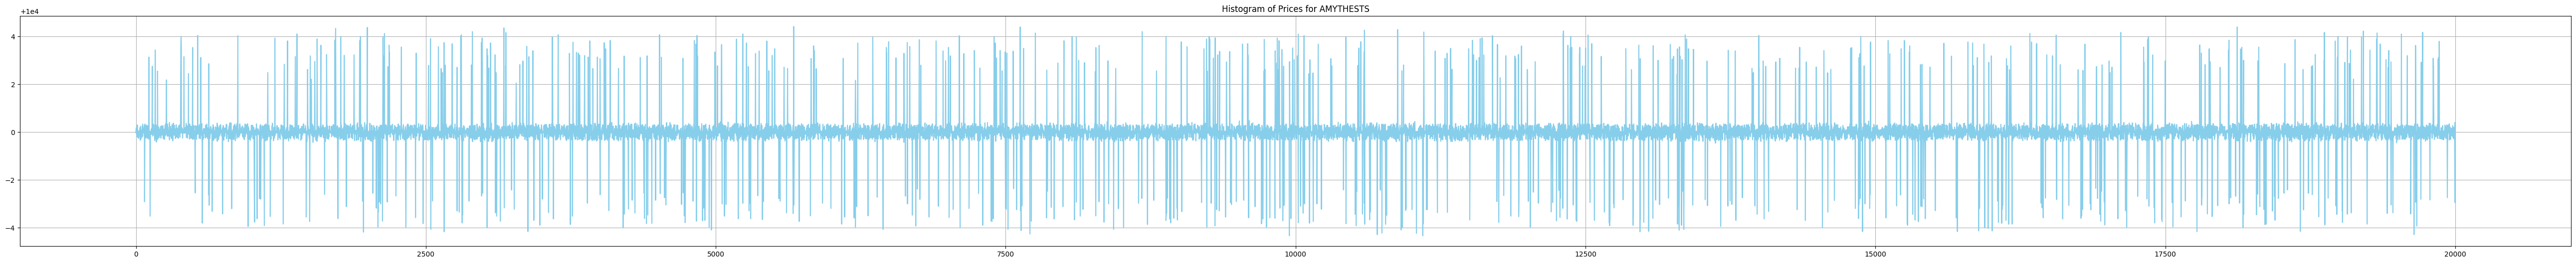

In [76]:

plt.figure(figsize=(66, 6))
plt.plot(prices[prices['product'] == 'AMETHYSTS']['avsadsaf'], color='skyblue',linestyle='-', label='Weighted Avg Price')
plt.title('Histogram of Prices for AMYTHESTS')
plt.grid(True)
plt.show()

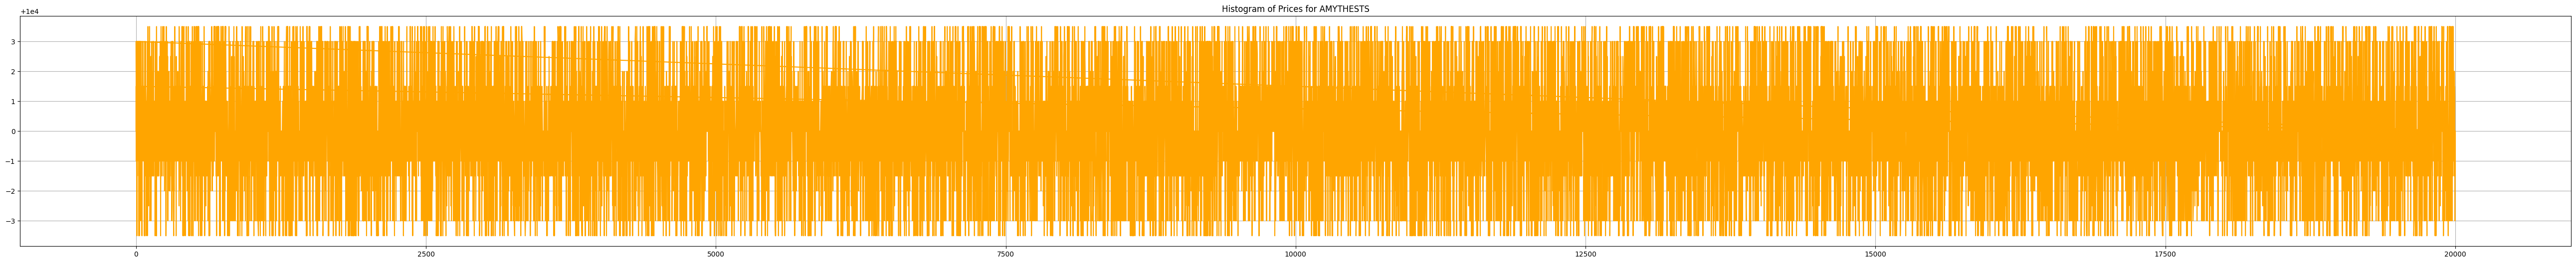

In [77]:
plt.figure(figsize=(66, 6))
plt.plot(prices[prices['product'] == 'AMETHYSTS']['mid_price'], color='orange',linestyle='-', label='Mid Price')
plt.title('Histogram of Prices for AMYTHESTS')
plt.grid(True)
plt.show()